Goal: Train and test a Linear Regression model using features: Bednights, Region, HHSize, HHEmployed, HHTANF, and slotted along with group: FamilyID to be able to predict bednights. Evaluate and iterate model.

In [1]:
##Load Modules for Regression Analysis training and testing
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
##Load Data, first inspection, create dummies for RegionCode
reg1 = pd.read_csv("C:/Users/morel/Downloads/Model_Training_Data.csv")
reg1_dummies = pd.get_dummies(reg1, columns=['RegionCode'], dtype=int)
print(reg1_dummies.head(5))

   FamilyID  ResidentID  Bednights  HHSize  HHEmployed  HHTANF  Slotted  \
0       243         957        957       4           1       0        0   
1       243         958        957       4           1       0        0   
2       243         959        957       4           1       0        0   
3       243         960        957       4           1       0        0   
4       242         973        944       3           1       0        1   

   RegionCode_1  RegionCode_2  RegionCode_3  RegionCode_4  RegionCode_5  
0             1             0             0             0             0  
1             1             0             0             0             0  
2             1             0             0             0             0  
3             1             0             0             0             0  
4             1             0             0             0             0  


In [3]:
##EDA: no missing expected. No duplicates expected.
reg1_dummies.isna().sum()

FamilyID        0
ResidentID      0
Bednights       0
HHSize          0
HHEmployed      0
HHTANF          0
Slotted         0
RegionCode_1    0
RegionCode_2    0
RegionCode_3    0
RegionCode_4    0
RegionCode_5    0
dtype: int64

In [4]:
reg1_dummies.duplicated().any()

False

In [5]:
##EDA: descriptive stattistics.
##FamilyID and ResidentID aren't interpretable.
##Each individual stayed at the facility for an average of 493 nights, for a median of 396. 50% of people stayed for 396 nights,
##some people stayed for many fewer nights, a minimum of 80 nights, skewing the average low. The standard deviation is also high.
##Regioncode is categorical. However, 50% of people are from region 1.
##50% of families have 4 people. On average, each family has 4.5 members.
##HHEmployed is categorical (yes/no). However, over 50% of households have at least employed adult. This is supported by the average,
##showing 70% of households have at elast one employed adult.
##HHTANF is categorical (yes,no). However, 50% of households have no members that receive TANF. This is supported by the average,
##showing that 40% of households have a member (or more) recieving TANF.
##Slotted is categorical (yes/no). However, 50% of families were slotted before they moved out. This is supported by the average,
##showing that about 60% of families were slotted before they move out.
reg1_dummies.describe()

,FamilyID,ResidentID,Bednights,HHSize,HHEmployed,HHTANF,Slotted,RegionCode_1,RegionCode_2,RegionCode_3,RegionCode_4,RegionCode_5
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,470.231959,1787.432990,492.845361,4.541237,0.721649,0.438144,0.634021,0.618557,0.103093,0.123711,0.144330,0.010309
std,137.892963,465.329242,295.934047,1.570733,0.449347,0.497443,0.482950,0.486998,0.304867,0.330104,0.352333,0.101271
min,223.000000,957.000000,80.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.000000,1199.250000,280.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,534.000000,2043.500000,396.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,575.000000,2114.750000,794.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,596.000000,2201.000000,1017.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
##Regression analysis: predicto move out date - prepare data
x = reg1_dummies.drop(columns=['Bednights','FamilyID','ResidentID']) ##features doesn't include target values: bednights, or FamilyID (not a feature)
y = reg1_dummies['Bednights']                                        ##target values
groups = reg1_dummies['FamilyID']                                    ##groupding varible for GroupKFOld to mitigate autocorrelation, keeps all members of the 
                                                             ##same family together to not make the model seem better than it actually is

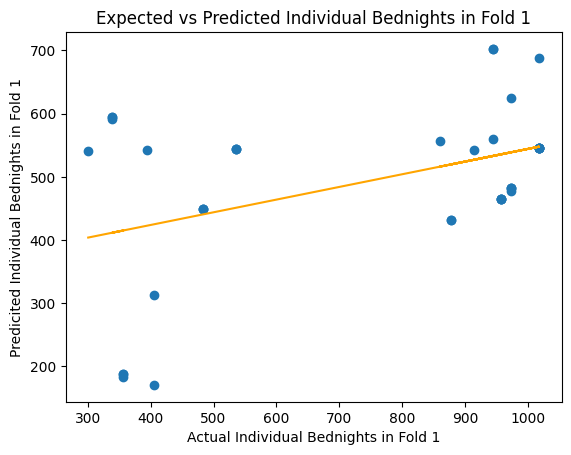

Fold 1 - MSE: 123469.5343, RMSE: 351.3823, R^2: -0.6135173775072036


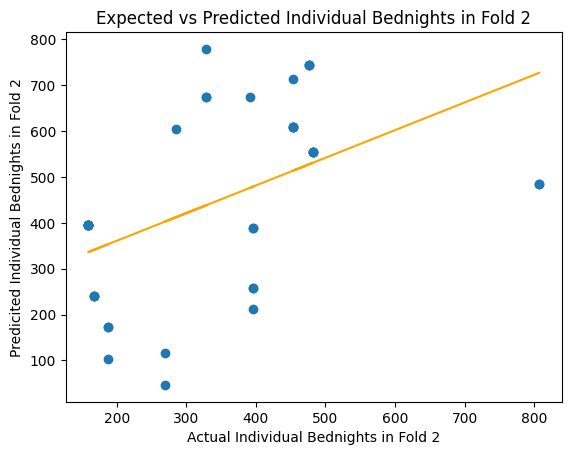

Fold 2 - MSE: 45738.3675, RMSE: 213.8653, R^2: -0.692058555872884


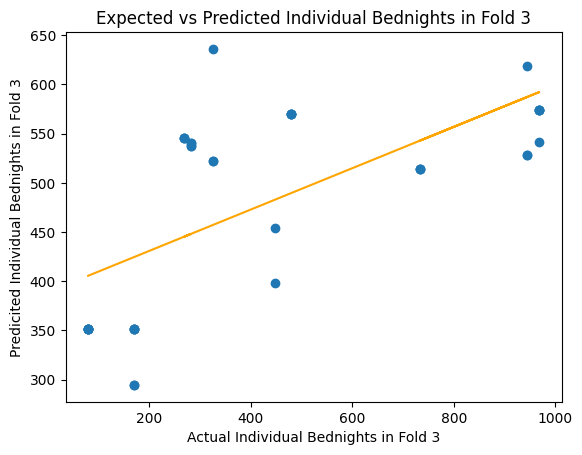

Fold 3 - MSE: 69279.1565, RMSE: 263.2093, R^2: 0.2997210585580521


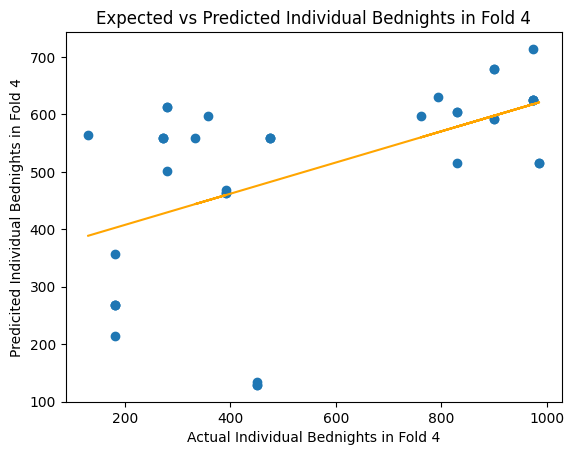

Fold 4 - MSE: 70214.5517, RMSE: 264.9803, R^2: 0.24096572708730823


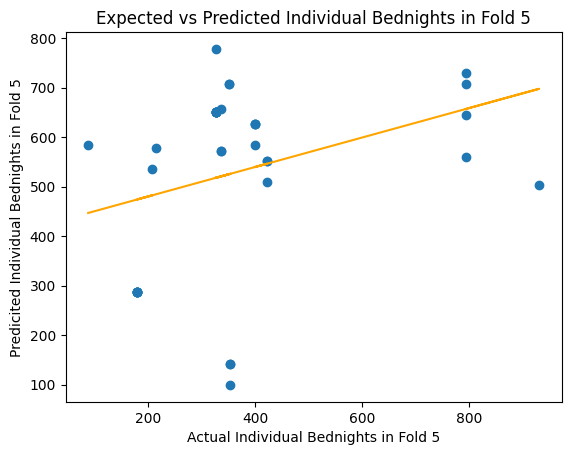

Fold 5 - MSE: 71735.6466, RMSE: 267.8351, R^2: -0.9295712925129793


<Figure size 640x480 with 0 Axes>

In [7]:
##Regression Analysis: predict move out date
##create folds
gkf = GroupKFold(n_splits = 5)

##split the data in each fold
for fold, (train_idx, test_idx) in enumerate(gkf.split(x, y, groups)):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ##train a model and predict target values for each fold
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    ##compare predicted values and expected values for each model
    plt.scatter(y_test, y_pred)
    plt.xlabel(f'Actual Individual Bednights in Fold {fold+1}')
    plt.ylabel(f'Predicited Individual Bednights in Fold {fold+1}')
    plt.title(f'Expected vs Predicted Individual Bednights in Fold {fold+1}')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a*(y_test)+b, color='orange')
    plt.show()
    plt.clf()

    ##Evaluate. The higher the mse & rmse, the worse the model. The lower and more negative the R^2 the worse the model
    ##the models are very bad. they are equally bad from the stable RMSEs and the similar R^2s.
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2}')

Goal: Improve the model.

In [8]:
##Sequential feature selection to build the best model by adding onw feature at a time
##HHSize and HHEmployed are the features that best predict bednights.
set_config(enable_metadata_routing=True)
sfs = SequentialFeatureSelector(LinearRegression(), direction='forward', scoring='r2', cv=gkf)
sfs.fit(x, y, groups=groups)
print(x.columns[sfs.get_support()])

Index(['HHEmployed', 'RegionCode_3', 'RegionCode_4', 'RegionCode_5'], dtype='object')


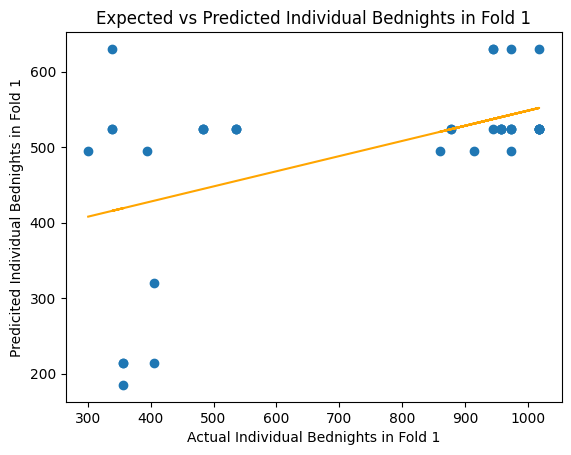

Fold 1 - MSE: 117034.5551, RMSE: 342.1031, R^2: -0.5294241569208618


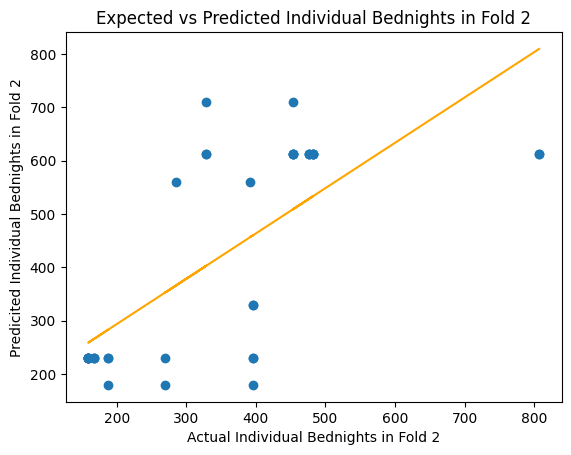

Fold 2 - MSE: 24283.9934, RMSE: 155.8332, R^2: 0.10163083957202512


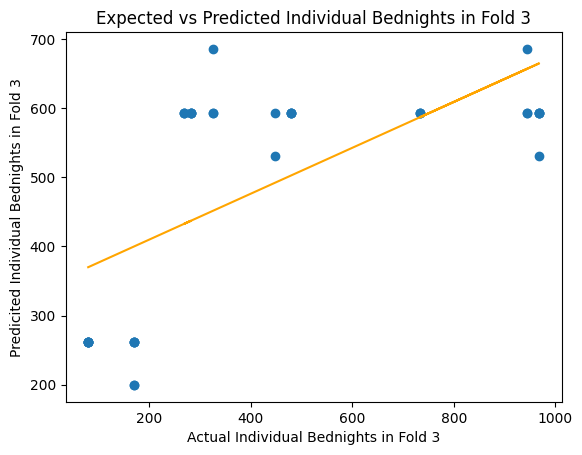

Fold 3 - MSE: 61766.5623, RMSE: 248.5288, R^2: 0.37565892695284675


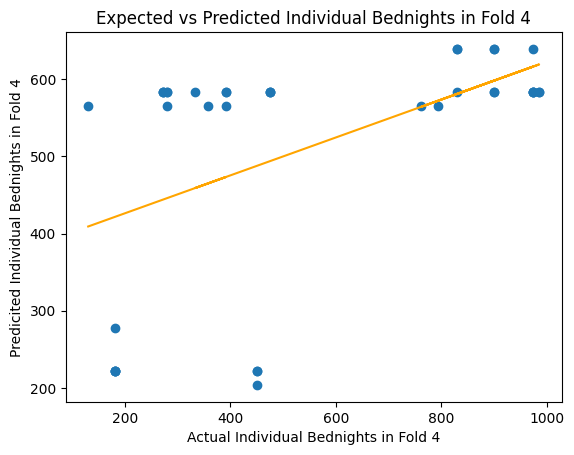

Fold 4 - MSE: 71002.5374, RMSE: 266.4630, R^2: 0.2324474346072175


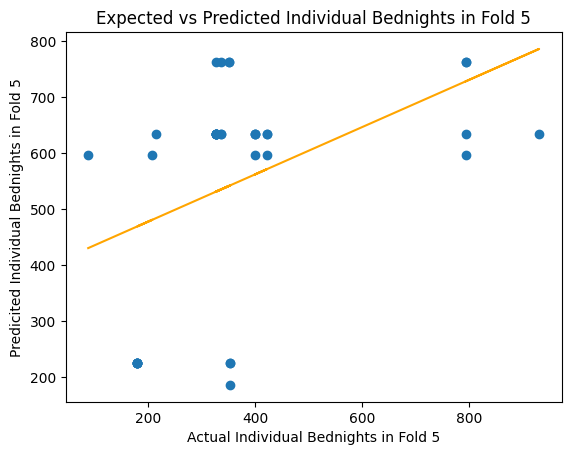

Fold 5 - MSE: 73524.4289, RMSE: 271.1539, R^2: -0.9776866056587641


<Figure size 640x480 with 0 Axes>

In [9]:
##Review new model using only HHSize and HHEmployed
x2 = reg1_dummies[['RegionCode_3', 'RegionCode_4', 'RegionCode_5','HHEmployed']]
y2 = reg1_dummies['Bednights']                           
groups2 = reg1_dummies['FamilyID']

gkf = GroupKFold(n_splits = 5)

##split the data in each fold
for fold, (train_idx, test_idx) in enumerate(gkf.split(x2, y2, groups2)):
    x_train, x_test = x2.iloc[train_idx], x2.iloc[test_idx]
    y_train, y_test = y2.iloc[train_idx], y2.iloc[test_idx]

    ##train a model and predict target values for each fold
    model2 = LinearRegression()
    model2.fit(x_train, y_train)
    y_pred = model2.predict(x_test)

    ##compare predicted values and expected values for each model
    plt.scatter(y_test, y_pred)
    plt.xlabel(f'Actual Individual Bednights in Fold {fold+1}')
    plt.ylabel(f'Predicited Individual Bednights in Fold {fold+1}')
    plt.title(f'Expected vs Predicted Individual Bednights in Fold {fold+1}')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a*(y_test)+b, color='orange')
    plt.show()
    plt.clf()

    ##Evaluate. The higher the mse & rmse, the worse the model. The lower and more negative the R^2 the worse the model
    ##the new models are very bad. they are equally bad from the stable RMSEs and the similar R^2s.
    set_config(enable_metadata_routing=False)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2}')

Outcome: Linear Regression model and Sequential Fit Selector used to try to improve model. Model remains neutral to very bad. Will attempt Random Forest Regression.